# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Customer churn is the loss of customers for a business. Churn is calculated by how many customers leave your business in a given period of time. Customer churn is important for businesses to know because it is a picture of a business's success in retaining customers.

# The Objective
In this project, I will create a model that can determine whether the customer will unsubscribe or remain subscribed.

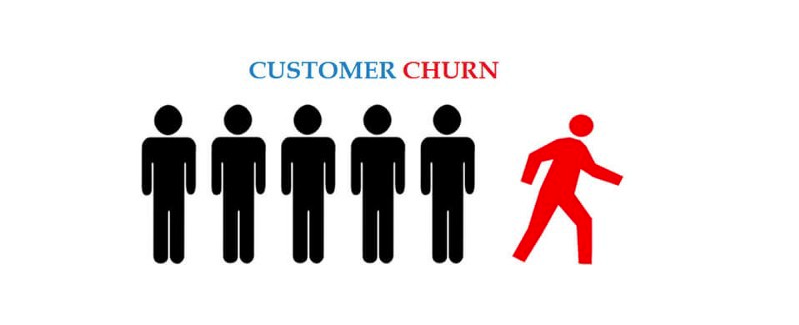

In [7]:
Image(filename='customer churn.png') 

# A. Library

In [2]:
# Data Exploring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data Modelling
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

# Data Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Save Model
import pickle

# B. Data Loading

In [5]:
data = pd.read_csv('Telco_customer_churn_using_ann.csv')
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.shape

(7043, 21)

### B1. Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From this basic info, it can be known that the dataframe is formed from:
- 1 column of type **float**
- 2 columns of type **integer**
- 18 columns of type **object**
- 2 data type columns **integer**
- **at first glance no missing value** but will be looked at further in the **data cleaning** section

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- only **found 1 anomaly** in the dataset, the **TotalCharges** column is not displayed on the datascribe. it seems that **the data type is wrong**, improvements will be made to the data cleaning.

In [ ]:
print("All columns Unique values count")
for col in data:
    print(col, len(data[col].unique()), sep=': ')

All columns Unique values count
customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


## B2. Data Cleaning

### B2.1 Replace Data Type

fixed the data type in the 'TotalCharges' column

In [ ]:
data['TotalCharges'] = data.TotalCharges.replace(' ', np.nan) # replace empty space with NaN

In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype(float) # convert to float

### B2.2 Data Missing

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- found **11 missing value** in the 'TotalCharges' column, **because the number is so small that it has no significant effect on the data so the missing value will be dropped**.

In [ ]:
data = data.dropna()

### B2.3 Data duplicated

In [ ]:
# checking duplicated data
data.duplicated().sum()

0

# C. Data Preprocessing

### C1. Data Prepared

The "customerID" column will be removed because it is assumed that it will not be a feature and has no relationship.

In [ ]:
data = data.drop(columns=['customerID'])

Change the value of the target column, namely the 'churn' column with simple encoding.

In [ ]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

### C2. Split Data

There will be a separation of training set, validation set, and testing set data in a ratio of 7:2:1

In [ ]:
# df_train_val, df_test
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=23, stratify=data.Churn)

# df_train, df_val
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.Churn)

### C3. Feature and Target
Separates the feature column from its target column.

In [ ]:
# Training 
X_train = df_train.drop(['Churn'], axis=1)
y_train = df_train['Churn']

# Validation
X_val = df_val.drop(['Churn'], axis=1)
y_val = df_val['Churn']

### C4. Pipeline Scalling dan Encoding Feature

Columns with numerical data types will be called, and columns with category data types will be encoded.

In [ ]:
# Scaling feature numeric
num_pipe = Pipeline([('scaler', StandardScaler())])

# Encoding feature categorical
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

# pipeline process
preprocessor = ColumnTransformer([
    ('num', num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

- A column transformer is used because the process pipeline uses branching, so it cannot be used as a one-way regular pipeline.

**Apply pipeline changes to X_train and X_val**

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# D. ANN Modeling
*Artificial Neural Network*

### D1. Pipeline

In [ ]:
# Training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(500).batch(50)

# Validation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(500).batch(50)

- Data Training and Validation Given Shuffle Treatment and Divided by each batch (50)

### D2. Model

In [ ]:
# 5 hidden layer
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(32, activation='relu')(input_data)
hidden_2 = Dense(2, activation='relu')(hidden_1)
output_data = Dense(1, activation='sigmoid')(hidden_2 )

model = Model(inputs=input_data, outputs=output_data)

### D3. Model Training

In [ ]:
# Compile model
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_dataset, epochs=200, validation_data=val_dataset, verbose=0)

In [ ]:
# summary model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_83 (Dense)            (None, 32)                1472      
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 dense_85 (Dense)            (None, 8)                 136       
                                                                 
 dense_86 (Dense)            (None, 4)                 36        
                                                                 
 dense_87 (Dense)            (None, 2)                 10        
                                                                 
 dense_88 (Dense)            (None, 1)                 3   

### D4. Model Evaluation

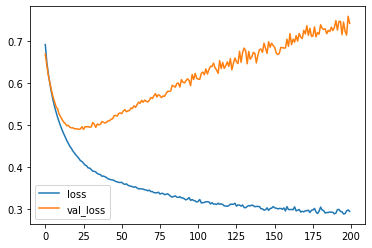

In [ ]:
# model results entered on a dataframe
metrics = pd.DataFrame(history.history)

metrics[['loss', 'val_loss']].plot()

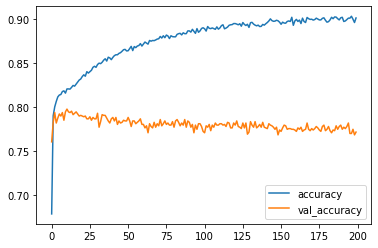

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
print('------------------Training Set------------------')
print(classification_report(y_train, model.predict(X_train).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val, model.predict(X_val).round()))

------------------Training Set------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3717
           1       0.92      0.69      0.79      1345

    accuracy                           0.90      5062
   macro avg       0.91      0.83      0.86      5062
weighted avg       0.90      0.90      0.90      5062

------------------Validation Set------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       929
           1       0.60      0.42      0.50       337

    accuracy                           0.77      1266
   macro avg       0.71      0.66      0.67      1266
weighted avg       0.76      0.77      0.76      1266



# E. Model Improvement

In [ ]:
# Define the model
# 5 hidden layer
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(32, activation='relu')(input_data)
hidden_2 = Dense(16, activation='relu')(hidden_1 )
hidden_3 = Dense(8, activation='relu')(hidden_2 )
hidden_4 = Dense(4, activation='relu')(hidden_3 )
hidden_5 = Dense(2, activation='relu')(hidden_4 )
output_data = Dense(1, activation='sigmoid')(hidden_5 )

model = Model(inputs=input_data, outputs=output_data)

# Compile the model
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_25 (Dropout)        (None, 45)                0         
                                                                 
 dense_89 (Dense)            (None, 16)                736       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_90 (Dense)            (None, 10)                170       
                                                                 
 dense_91 (Dense)            (None, 4)                 44        
                                                                 
 dense_92 (Dense)            (None, 2)                 10        
                                                                 
 dense_93 (Dense)            (None, 1)               

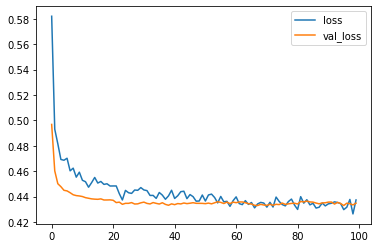

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

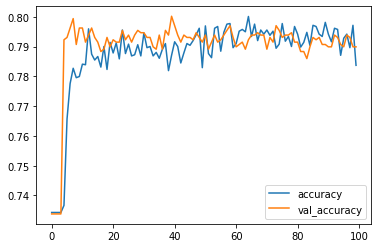

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
print('------------------Training Set------------------')
print(classification_report(y_train, model.predict(X_train).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val, model.predict(X_val).round()))

------------------Training Set------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3717
           1       0.69      0.50      0.58      1345

    accuracy                           0.81      5062
   macro avg       0.77      0.71      0.73      5062
weighted avg       0.80      0.81      0.80      5062

------------------Validation Set------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       929
           1       0.65      0.45      0.53       337

    accuracy                           0.79      1266
   macro avg       0.74      0.68      0.70      1266
weighted avg       0.78      0.79      0.78      1266



# F. Model Testing (Inference)

In [ ]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4569,Female,0,No,No,22,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.80,1054.60,1
2099,Female,0,Yes,No,40,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,0
6911,Female,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.10,1087.70,0
2329,Female,0,No,No,57,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,One year,No,Electronic check,94.70,5468.95,0
5157,Female,0,Yes,Yes,16,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),68.25,1114.85,0


In [ ]:
# Split features and target
X_test = df_test.drop(['Churn'], axis=1) # Features
y_test = df_test['Churn'] # Target

# Transform data test
X_test = preprocessor.transform(X_test)

# Predict data test
y_pred = model.predict(X_test).round()

# Membuat dataframe
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten().astype(int)})
predictions[predictions.Actual == 1].head(5)

,Actual,Predicted
4569,1,0
1176,1,1
2448,1,1
2262,1,1
1772,1,1


[[465  52]
 [100  87]]


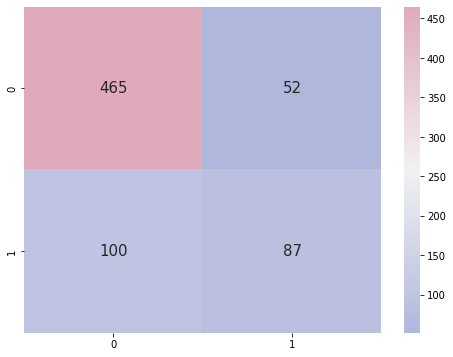

In [ ]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

# Model Saving and Deployment

In [ ]:
# Save model
model.save('model.h5')

# Save pipeline
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)